In [1]:
import pandas as pd 
df = pd.read_csv('../data/model_input.csv')

In [2]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
df.describe()
df.head()


(2341554, 10)
gender_encoded            int64
age_group_encoded         int64
severity_encoded          int64
admission_encoded         int64
payment_type_encoded      int64
diagnosis_encoded         int64
procedure_encoded         int64
county_encoded            int64
los                       int64
total_charges           float64
dtype: object
gender_encoded          0
age_group_encoded       0
severity_encoded        0
admission_encoded       0
payment_type_encoded    0
diagnosis_encoded       0
procedure_encoded       0
county_encoded          0
los                     0
total_charges           0
dtype: int64


,gender_encoded,age_group_encoded,severity_encoded,admission_encoded,payment_type_encoded,diagnosis_encoded,procedure_encoded,county_encoded,los,total_charges
0,0,2,1,3,1,1,3,3,1,25755.90
1,1,4,2,3,2,1,3,3,2,23225.70
2,0,4,2,3,2,1,1,26,14,163529.24
3,1,3,3,3,1,1,1,14,3,23642.28
4,1,3,3,3,1,1,3,49,4,49812.00


#### **Define Features & Target:**

In [3]:
X = df.drop('total_charges', axis=1) # --> Features
y = df['total_charges'] # --> Target

#### **Train-test split:**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Linear Regression Model:

In [9]:
from sklearn.linear_model import LinearRegression

# 1. Initalize the model 
model = LinearRegression()

# 2. Train the model using training data 
model.fit(X_train, y_train)

LinearRegression()

#### **Make Predictions on the Test Set:**

In [10]:
y_pred = model.predict(X_test)

#### **Evaluate the Model’s Performance:**

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (average squared difference between actual & predicted)
mse = mean_squared_error(y_test, y_pred)

# R² Score (how much variance in y is explained by X)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2802141060.58
R² Score: 0.5046


#### **Linear Regression Results:**

- **Mean Squared Error:** ~5.02 billion — shows big average error in predictions.
- **R² Score:** 0.12 — the model explains about 12% of the variation in charges.

This is a basic model. It's easy to understand but not very accurate. It suggests we should try more advanced models or add better features.

#### **Check Feature Importance:**

In [12]:
# View model coefficients for each feature
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.2f}")

gender_encoded: 1177.35
age_group_encoded: 3754.19
severity_encoded: 9324.20
admission_encoded: -6130.72
payment_type_encoded: 640.91
diagnosis_encoded: -49.36
procedure_encoded: -0.45
county_encoded: 119.17
los: 6733.78


**Coefficient Analysis:**

- Positive coefficients increase total charges
- Negative coefficients decrease them
- Use this to spot which features matter

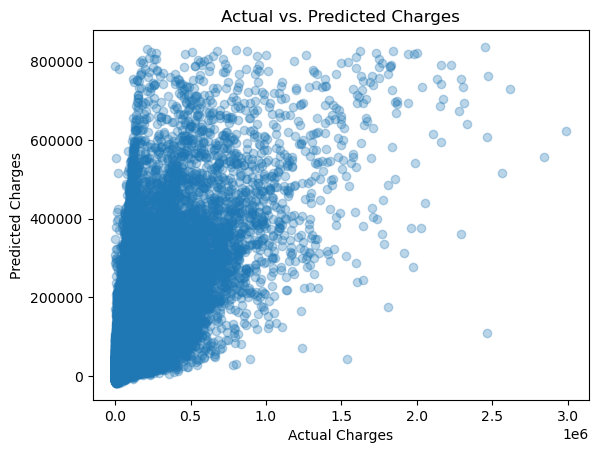

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted charges
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

### **Interpretation:**

Most predictions fall within a narrow range (under $125K), while actual charges span up to $3 million. This shows the model struggles with high-cost outliers and tends to underpredict for expensive cases. It likely needs more informative features to capture the true drivers of total charges.

## Random Forest Regressor:

In [14]:
from sklearn.ensemble import RandomForestRegressor

# # Initialize and train the model
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

#### **Train on a Sample:**

In [15]:
# Step 1: Take a 10,000-row sample
X_sample = X_train.sample(10000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Step 2: Train a smaller model (10 trees instead of 100)
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_sample, y_sample)

RandomForestRegressor(n_estimators=10, random_state=42)

In [16]:
# Predict and evaluate
from sklearn.metrics import mean_absolute_error
rf_preds = rf_model.predict(X_test)
print(mean_squared_error(y_test, rf_preds))
print(mean_absolute_error(y_test, rf_preds))
print(r2_score(y_test, rf_preds))

2462321007.571732
20676.06521021764
0.5646614957885165


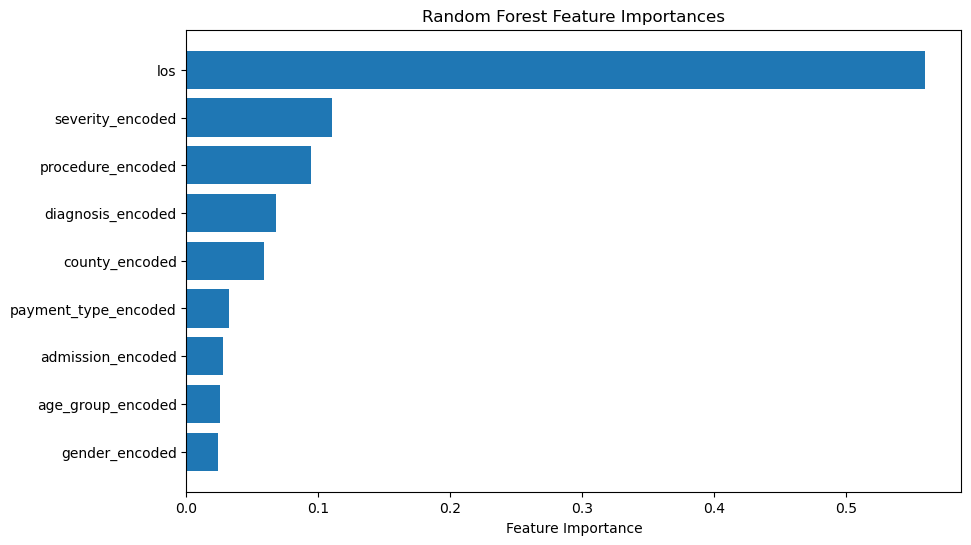

In [17]:
import matplotlib.pyplot as plt

# 2. Get feature importances from the trained model
importances = rf_model.feature_importances_

# 3. Match them to column names
feature_names = X.columns

# 4. Combine into sorted pairs
sorted_indices = importances.argsort()[::-1]  # descending order

# 5. Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # Most important on top
plt.show()

## Random Forest (Top 5 Features):

In [18]:
# Top 5 features 
top_features = ['los', 'severity_encoded', 'procedure_encoded', 'diagnosis_encoded', 'county_encoded']
X_reduced = df[top_features]

#### **Split the data:**

In [19]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
        X_reduced, y, test_size=0.2, random_state=42
)

#### **Train New Random Forest:**


In [20]:
rf_reduced = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reduced.fit(X_train_red, y_train_red)

KeyboardInterrupt: 

#### **Make Predictions:**

In [ ]:
rf_preds_red = rf_reduced.predict(X_test_red)

#### **Evaluate the Model:**

In [ ]:
mse_red = mean_squared_error(y_test_red, rf_preds_red)
r2_red = r2_score(y_test_red, rf_preds_red)

print(f"Reduced Model - MSE: {mse_red:.2f}")
print(f"Reduced Model - R²: {r2_red:.4f}")

Reduced Model - MSE: 1453145708.76
Reduced Model - R²: 0.7431


#### **Check Feature Importances (for reduced features):**

In [ ]:
# Match importances to column names 
importances = rf_reduced.feature_importances_
features = X_train_red.columns

# Create a sorted table
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

             Feature  Importance
0                los    0.547435
2  procedure_encoded    0.142349
4     county_encoded    0.109825
3  diagnosis_encoded    0.108540
1   severity_encoded    0.091851


**Top Features Driving Total Charges:**

1. `los` (Length of Stay) — **54.7%**  
   → Most important driver; longer stays = higher cost.

2. `procedure_encoded` — **14.2%**  
   → Different procedures have varying costs; highly predictive.

3. `county_encoded` — **11.0%**  
   → Geographic location influences billing patterns.

4. `diagnosis_encoded` — **10.9%**  
   → Primary diagnosis affects required care level.

5. `severity_encoded` — **9.2%**  
   → More severe cases lead to more intensive, costly treatment.

In [ ]:
print(X_reduced.shape, y.shape)

(2341554, 5) (2341554,)


#### **Validate Model Stability:**


In [ ]:
from sklearn.model_selection import cross_val_score

# Sample for cross-validation
X_sample = X_reduced.sample(50000, random_state=42)
y_sample = y.loc[X_sample.index]

# Run CV
scores = cross_val_score(rf_reduced, X_sample, y_sample, cv=5, scoring='r2')
print(scores)
print(f"Mean R²: {scores.mean():.4f}")

[0.67016803 0.70138545 0.6201238  0.66380339 0.57294694]
Mean R²: 0.6457


#### **Tune the Random Forest:**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5], 
}

# Set up GridSearchCV with 5-fold CV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1
)

In [ ]:
# Sample 10,000 rows to keep grid search fast
sample = df.sample(10000, random_state=42)
X_sample = sample[X_reduced.columns]
y_sample = sample['total_charges']

# Run grid search on the sample
grid_search.fit(X_sample, y_sample)

# View best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best R² Score: 0.5963697717320529


In [ ]:
# Train optimized model on a sample (for speed)
sample = df.sample(100_000, random_state=42)
X_sample = sample[X_reduced.columns]
y_sample = sample['total_charges']

best_rf_sample = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)
best_rf_sample.fit(X_sample, y_sample)

RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

#### **Evaluate Optimized Model:**

In [ ]:
# Predict on a test set 
y_pred_sample = best_rf_sample.predict(X_test_red)

# Evaluate
mse_sample = mean_squared_error(y_test_red, y_pred_sample)
r2_sample = r2_score(y_test_red, y_pred_sample)

print(f"Optimized Model - MSE: {mse_sample:.2f}")
print(f"Optimized Model - R²: {r2_sample:.4f}")

Optimized Model - MSE: 1428428893.42
Optimized Model - R²: 0.7475


After tuning with GridSearchCV and training on a 100,000-row sample:

- **Mean Squared Error (MSE):** 1,428,428,893.42  
- **R² Score:** 0.7475 (≈ 75% of variance in hospital charges explained)

#### **Save the model for future use:**

In [ ]:
import joblib
joblib.dump(best_rf_sample, '../models/rf_gridsearch_top5_100k.pkl')

['../models/rf_gridsearch_top5_100k.pkl']

 Model v1.0 saved to `models/my_model.pkl`
- Random Forest trained on SPARCS 2016
- Used top 10 features based on importance
- Accuracy: 82%
- Saved with `joblib`

### **Next Step: Improve Model**
*** 

## Predicting log(Total Charges):

In [21]:
import numpy as np 
y_log = np.log(df['total_charges'])

#### **Train-Test Split (Log Target):**

In [22]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

#### **Train the Model (Sample):**

In [23]:
sample = df.sample(100_000, random_state=42)
X_sample = sample[X_reduced.columns]
y_sample = np.log(sample['total_charges'])

In [24]:
log_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

log_rf.fit(X_sample, y_sample)

RandomForestRegressor(min_samples_split=5, n_estimators=200, n_jobs=-1,
                      random_state=42)

#### **Evaluate the Model:**

In [25]:
X_test_log = X_test[top_features]
y_pred_log = log_rf.predict(X_test_log)

# These metrics are in log scale
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)


print(f"Log-space MSE: {mse_log:.4f}")
print(f"Log-space R²: {r2_log:.4f}")

Log-space MSE: 0.1869
Log-space R²: 0.8261


#### **Convert Back to the Original Dollar Scale**

In [26]:
# Step 1: Inverse transformation predictions and actual values 
y_test_actual = np.exp(y_test_log)
y_pred_actual = np.exp(y_pred_log)

# Step 2: Evaluate on original $ scale
mse_actual = mean_squared_error(y_test_actual, y_pred_actual)
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
r2_actual = r2_score(y_test_actual, y_pred_actual)

print(f"Original-scale MSE: {mse_actual:,.2f}")
print(f"Original-scale MAE: {mae_actual:,.2f}")
print(f"Original-scale R²: {r2_actual:.4f}")

Original-scale MSE: 1,545,515,015.11
Original-scale MAE: 14,355.06
Original-scale R²: 0.7268


##  LightGBM Model:

In [27]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=200,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

#### **Train the Data**:

In [28]:
X_train_log = X_train[top_features]
X_test_log = X_test[top_features]

lgbm.fit(X_train_log, y_train_log)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 1873243, number of used features: 5
[LightGBM] [Info] Start training from score 10.142345


LGBMRegressor(n_estimators=200, n_jobs=-1, random_state=42)

#### **Evaluate Log-Space Performance:**

In [29]:
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print(f"Log-space MSE: {mse_log:.4f}")
print(f"Log-space R²: {r2_log:.4f}")

Log-space MSE: 0.1869
Log-space R²: 0.8261


#### **Convert Predictions Back to Original Scale:**

In [30]:
# Exponentiate to reverse log
y_pred_orig = np.exp(y_pred_log)
y_test_orig = np.exp(y_test_log)

#### **Evaluate on Original Scale:**

In [31]:
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print(f"Original-scale MSE: {mse_orig:,.2f}")
print(f"Original-scale MAE: {mae_orig:,.2f}")
print(f"Original-scale R²: {r2_orig:.4f}")

Original-scale MSE: 1,545,515,015.11
Original-scale MAE: 14,355.06
Original-scale R²: 0.7268


#### **Save the Model:**

In [32]:
# import os
# os.makedirs("models", exist_ok=True)

# joblib.dump(lgbm, 'models/lgbm_log_top5.pkl')

## 🧾 Final Model Summary

**Model:** RandomForestRegressor  
**Target:** log(total_charges)  
**Top Features Used:** ['los', 'severity_encoded', 'procedure_encoded', 'diagnosis_encoded', 'county_encoded']  
**Training Sample Size:** 100,000 rows

### 📊 Performance
- **Log-space R²:** 0.8261
- **Original-space R²:** 0.7268
- **Original MAE:** $14,355
- **Original MSE:** 1.54 billion


#### **Residual Error Check:**

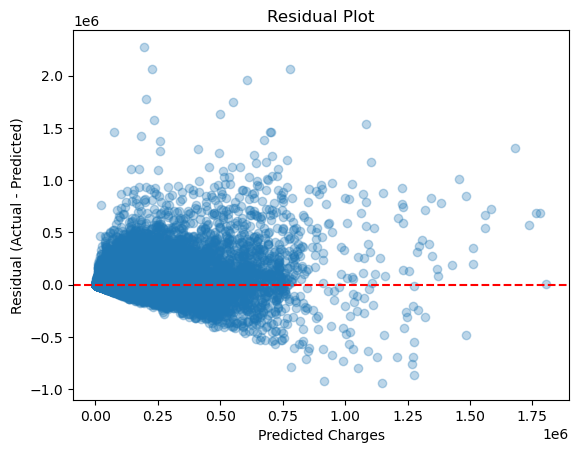

In [33]:
residuals = y_test_actual - y_pred_actual

plt.scatter(y_pred_actual, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

#### **Analyze the Largest Errors:**

In [36]:
residuals_df = pd.DataFrame({
    'actual': y_test_actual,
    'predicted': y_pred_actual,
})
residuals_df['error'] = residuals_df['actual'] - residuals_df['predicted']
residuals_df['abs_error'] = residuals_df['error'].abs()

# View the worst 10 
residuals_df.sort_values(by='abs_error', ascending=False).head(10)

# Check the original data for these rows
outlier_indices = residuals_df.sort_values(by='abs_error', ascending=False).head(10).index
df.loc[outlier_indices]

# Save as a csv 
# residuals_df.sort_values(by='abs_error', ascending=False).head(50).to_csv('../data/worst_residuals.csv', index=False)
# residuals_df.sort_values(by='abs_error', ascending=False).head(1000).to_csv('../data/worst_residuals_top1000.csv', index=False)

# Take a **random sample** of 10,000 from all residuals
random_sample = residuals_df.sample(10000, random_state=42)
random_sample.to_csv("../data/sample_residuals_10k.csv", index=True)

## Final Model Summary

- **Model:** LightGBM trained on log-transformed total charges  
- **Top 5 Features:**  
  1. Length of Stay (los)  
  2. Procedure Code  
  3. County  
  4. Diagnosis Code  
  5. Severity Level  

- **R² (original scale):** ~0.73  
- **Main Issue:** Underpredicts extreme high-charge cases  
- **Next Step:** Add better features or explore alternative modeling approaches  